In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/musaidriss/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

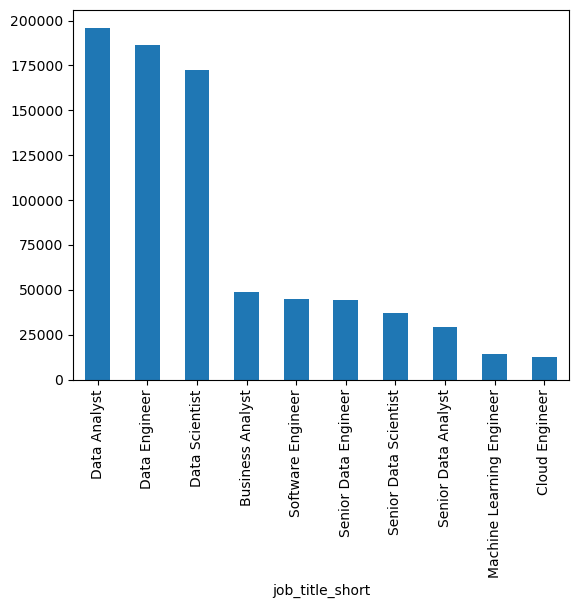

In [3]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [11]:
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax)
# .head(3) limits to top 3 categories

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

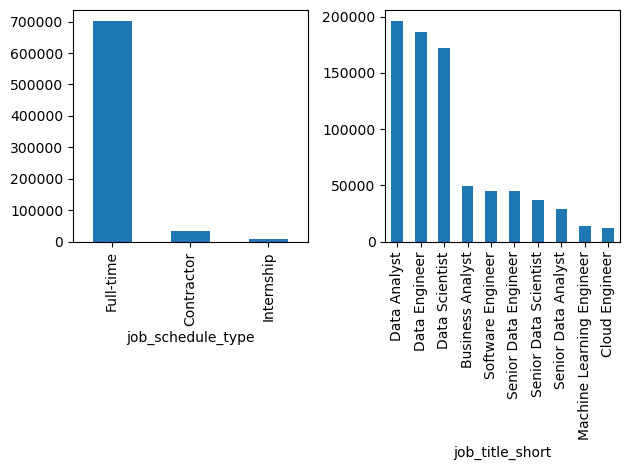

In [15]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
# swap ax[0] and ax[1] to change order of plots
fig.tight_layout()

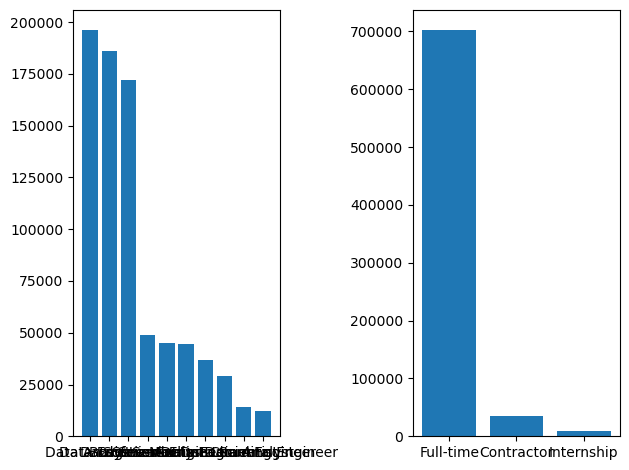

In [17]:
# Other Methods to Format Charts
fig, ax = plt.subplots(1, 2)
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))
fig.tight_layout()

Example - Counts of Tp skills in Job Postings

In [22]:
df_skills = df.copy()
# Make a copy of the original DataFrame so we don't modify it directly

df_skills = df_skills.explode('job_skills')
# Expand the 'job_skills' list into separate rows, one skill per row

skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
# Group by each skill and job title, then count how many times each combination occurs

df_skills_count = skills_count.reset_index(name='skills_count')
# Convert the grouped counts into a regular DataFrame and name the count column 'skills_count'

df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)
# Sort the DataFrame so that the most frequent skills appear at the top

df_skills_count
# Display the final table showing skills frequency per job title


,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


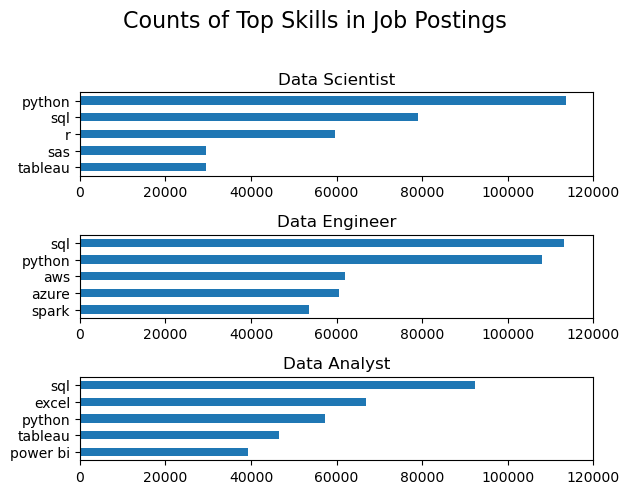

In [ ]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
fig, ax = plt.subplots(3, 1)

# # enumerate(jobs, start=1) loops over the list 'jobs', providing both the index (i) and the job title (job_title)
for i, job_title in enumerate(job_titles):
   df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
   df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=job_title)
   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0, 120000)
   fig.tight_layout()
   fig.suptitle('Counts of Top Skills in Job Postings', y=1.02, fontsize=16)